# Sports Image Recognition

Collection of sports images covering 73 different sports.. Images are 224,224,3 jpg format. Data is separated into train, test and valid directories. Additional a csv file is includes for those that wish to use it to create there own train, test and validation datasets.

**Inspiration** <br>

Wanted to build a clean data set that was easy to use and had no bad images or duplication between the train, test and validation data sets. Provides a good data set to test your models on. Design for straight forward application of keras preprocessing functions like ImageDataenerator.flowfromdirectory or is you use the csv file ImageDataGenerator.flowfromdataframe

![IMG](https://i.ibb.co/wh7LpYm/download.jpg)

## Downloading the data

In [ ]:
# Using Kaggle API to download the data
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hrushi11","key":"9b9f258483748efbefebd15f467936bf"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d gpiosenka/sports-classification

 98% 342M/350M [00:12<00:00, 20.6MB/s]
100% 350M/350M [00:13<00:00, 28.2MB/s]


In [ ]:
# downloading helper_functions.py
! wget https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py

--2021-10-05 07:01:49--  https://raw.githubusercontent.com/Hrushi11/Dogs_VS_Cats/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10139 (9.9K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]   9.90K  --.-KB/s    in 0s      

2021-10-05 07:01:49 (75.5 MB/s) - ‘helper_functions.py’ saved [10139/10139]



## Importing Dependancies

In [ ]:
#Importing dependancies
import os
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from helper_functions import unzip_data, walk_through_dir, plot_loss_curves, make_confusion_matrix, compare_historys

In [ ]:
#Unzipping the data
unzip_data("/content/sports-classification.zip")

In [ ]:
# To delete the zip file
!rm sports-classification.zip

In [ ]:
walk_through_dir("/content/train")

There are 73 directories and 0 images in '/content/train'.
There are 0 directories and 120 images in '/content/train/pommel horse'.
There are 0 directories and 136 images in '/content/train/javelin'.
There are 0 directories and 152 images in '/content/train/balance beam'.
There are 0 directories and 158 images in '/content/train/field hockey'.
There are 0 directories and 147 images in '/content/train/snowmobile racing'.
There are 0 directories and 132 images in '/content/train/motorcycle racing'.
There are 0 directories and 135 images in '/content/train/fencing'.
There are 0 directories and 167 images in '/content/train/olympic wrestling'.
There are 0 directories and 133 images in '/content/train/frisbee'.
There are 0 directories and 130 images in '/content/train/water polo'.
There are 0 directories and 169 images in '/content/train/basketball'.
There are 0 directories and 130 images in '/content/train/ski jumping'.
There are 0 directories and 149 images in '/content/train/bull riding'

## Setting up directories

In [ ]:
train_dir = "/content/train"
valid_dir = "/content/valid"
test_dir = "/content/test"

In [ ]:
classes = np.array(os.listdir(train_dir))
classes

array(['pommel horse', 'javelin', 'balance beam', 'field hockey',
       'snowmobile racing', 'motorcycle racing', 'fencing',
       'olympic wrestling', 'frisbee', 'water polo', 'basketball',
       'ski jumping', 'bull riding', 'giant slalom', 'hockey',
       'speed skating', 'swimming', 'track bicycle', 'nascar racing',
       'figure skating men', 'rowing', 'lacrosse', 'luge', 'rings',
       'boxing', 'rollerblade racing', 'harness racing', 'snow boarding',
       'wheelchair racing', 'sumo wrestling', 'uneven bars',
       'arm wrestling', 'tug of war', 'rock climbing', 'football',
       'curling', 'jai alai', 'croquet', 'horse jumping', 'archery',
       'wheelchair basketball', 'weightlifting', 'billiards', 'polo',
       'rugby', 'bobsled', 'surfing', 'barell racing', 'ampute football',
       'judo', 'bmx', 'parallel bar', 'sailboat racing', 'hurdles',
       'pole vault', 'air hockey', 'golf', 'horse racing', 'ice climbing',
       'formula 1 racing', 'shot put', 'hammer t

## Randomly plot image from train dataset

In [ ]:
# Preprocessing the images
def load_and_prep(filepath):
  # read the file path
  img = tf.io.read_file(filepath)
  # decode image
  img = tf.io.decode_image(img)
  # resizing the image
  img = tf.image.resize(img, (224, 224))

  return img

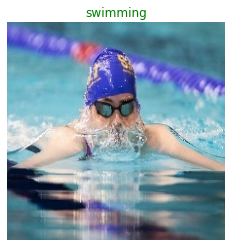

In [ ]:
# Plotting the images
random_class = random.choice(classes)
random_fp = train_dir + "/" + random_class + "/" +  random.choice(os.listdir(train_dir + "/" + random_class))
img = load_and_prep(random_fp)
plt.imshow(img / 255)
plt.axis(False)
plt.title(random_class, color="green");

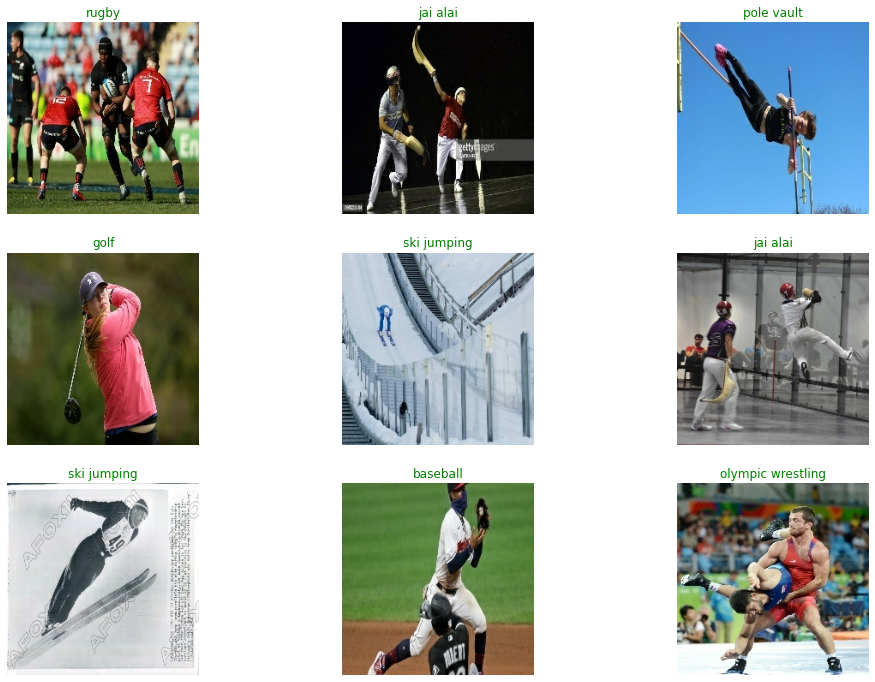

In [ ]:
# Plotting multiple images from train dataset
plt.figure(figsize=(17, 12))
for i in range(9):
  random_class = random.choice(classes)
  random_fp = train_dir + "/" + random_class + "/" +  random.choice(os.listdir(train_dir + "/" + random_class))
  img = load_and_prep(random_fp)

  # plotting the image
  plt.subplot(3, 3, i+1)
  plt.imshow(img/255)
  plt.axis(False)
  plt.title(random_class, color="green");

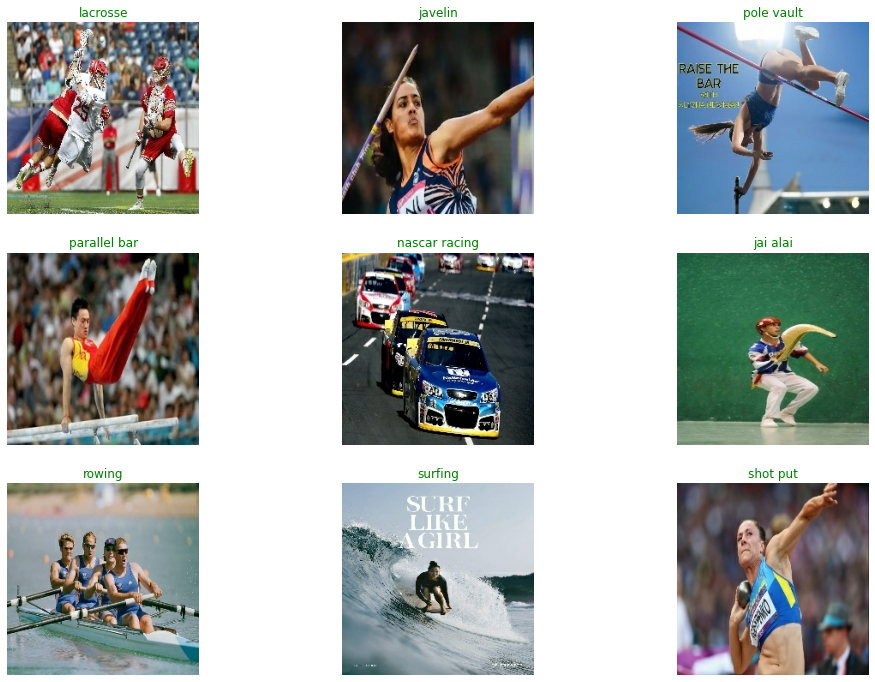

In [ ]:
# Plotting multiple images from test dataset
plt.figure(figsize=(17, 12))
for i in range(9):
  random_class = random.choice(classes)
  random_fp = test_dir + "/" + random_class + "/" +  random.choice(os.listdir(test_dir + "/" + random_class))
  img = load_and_prep(random_fp)

  # plotting the image
  plt.subplot(3, 3, i+1)
  plt.imshow(img/255)
  plt.axis(False)
  plt.title(random_class, color="green");

## Data Augmentation layer

In [ ]:
# Creating data augmentation layer
data_augmentation = tf.keras.Sequential([
   preprocessing.RandomFlip("horizontal"),
   preprocessing.RandomRotation(0.2),
   preprocessing.RandomZoom(0.2),
   preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2)
], name="data_augmentation_layer")

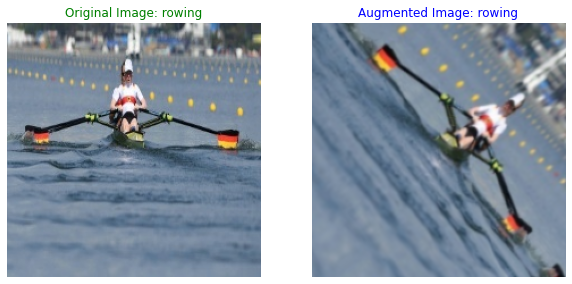

In [ ]:
# Plotting single set of augmented images
random_class = random.choice(classes)
random_fp = test_dir + "/" + random_class + "/" +  random.choice(os.listdir(test_dir + "/" + random_class))
img = load_and_prep(random_fp)
aug_img = data_augmentation(tf.expand_dims(img, axis=0))
aug_img = tf.image.resize(aug_img[0], (224, 224))

plt.figure(figsize=(10, 7))
# plotting original image
plt.subplot(1, 2, 1)
plt.imshow(img/255)
plt.axis(False)
label = f"Original Image: {random_class}"
plt.title(label, color="green")

# plotting augmented image
plt.subplot(1, 2, 2)
plt.imshow(aug_img/255)
plt.axis(False)
label = f"Augmented Image: {random_class}"
plt.title(label, color="blue");

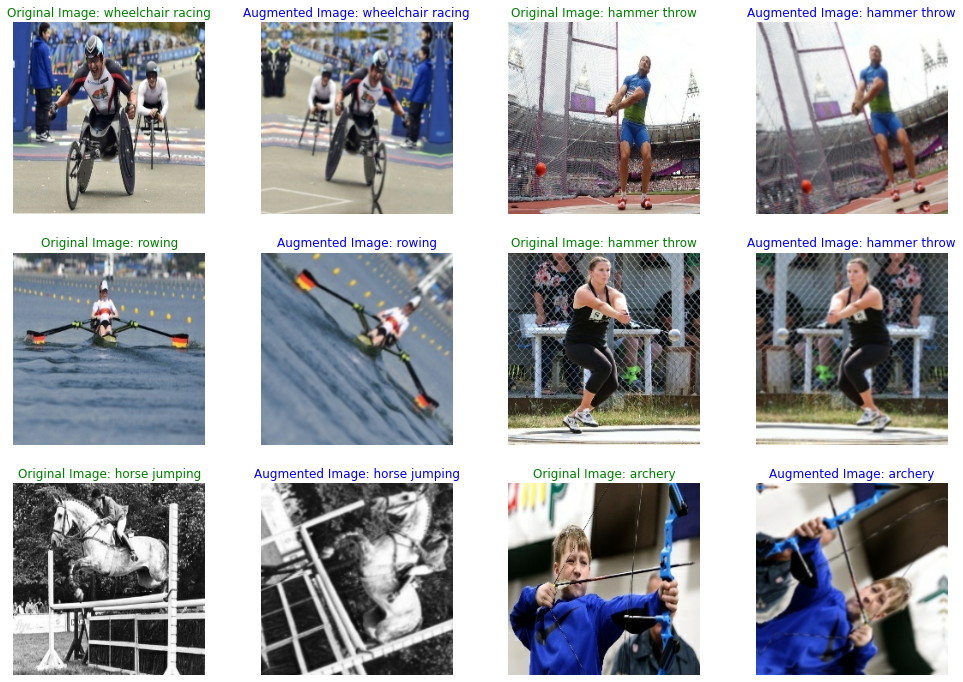

In [ ]:
# Plotting multiple set of augmented images
plt.figure(figsize=(17, 12))
for i in range(1, 12, 2):
  random_class = random.choice(classes)
  random_fp = test_dir + "/" + random_class + "/" +  random.choice(os.listdir(test_dir + "/" + random_class))
  img = load_and_prep(random_fp)
  aug_img = data_augmentation(tf.expand_dims(img, axis=0))
  aug_img = tf.image.resize(aug_img[0], (224, 224))

  # plotting original image
  plt.subplot(3, 4, i)
  plt.imshow(img/255)
  plt.axis(False)
  label = f"Original Image: {random_class}"
  plt.title(label, color="green")

  # plotting augmented image
  plt.subplot(3, 4, i+1)
  plt.imshow(aug_img/255)
  plt.axis(False)
  label = f"Augmented Image: {random_class}"
  plt.title(label, color="blue");

In [ ]:
# Setting up data generator
data_gen = ImageDataGenerator()

In [ ]:
IMG_SIZE = (224, 224)
# Setting up train test and validation data
train_data = data_gen.flow_from_directory(train_dir,
                                          IMG_SIZE,
                                          seed=42)

valid_data = data_gen.flow_from_directory(valid_dir,
                                          IMG_SIZE,
                                          seed=42)

Found 10416 images belonging to 73 classes.
Found 365 images belonging to 73 classes.
Found 365 images belonging to 73 classes.


In [ ]:
test_data = data_gen.flow_from_directory(test_dir,
                                         IMG_SIZE,
                                         shuffle=False)

Found 365 images belonging to 73 classes.


In [ ]:
len(train_data), len(valid_data), len(test_data)

(326, 12, 12)

## Model 1

In [ ]:
# Setting up base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Setting input layer   
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling")(x) 
outputs = tf.keras.layers.Dense(len(classes), activation="softmax", name="output_layer")(x) 
model_1 = tf.keras.Model(inputs, outputs)

# Compiling the model
model_1.compile(loss=tf.keras.losses.categorical_crossentropy,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fitting the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

16719872/16705208 [==============================] - 0s 0us/step
Epoch 1/5
326/326 [==============================] - 167s 406ms/step - loss: 2.0835 - accuracy: 0.5488 - val_loss: 0.7802 - val_accuracy: 0.8548
Epoch 2/5
326/326 [==============================] - 100s 307ms/step - loss: 0.9749 - accuracy: 0.7729 - val_loss: 0.4819 - val_accuracy: 0.9123
Epoch 3/5
326/326 [==============================] - 88s 269ms/step - loss: 0.7400 - accuracy: 0.8169 - val_loss: 0.3725 - val_accuracy: 0.9288
Epoch 4/5
326/326 [==============================] - 79s 242ms/step - loss: 0.6341 - accuracy: 0.8429 - val_loss: 0.3171 - val_accuracy: 0.9370
Epoch 5/5
326/326 [==============================] - 73s 223ms/step - loss: 0.5557 - accuracy: 0.8568 - val_loss: 0.2980 - val_accuracy: 0.9260


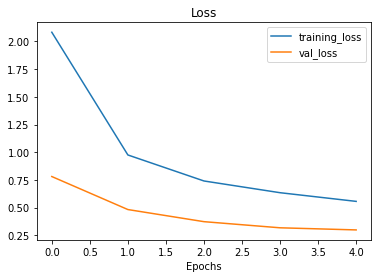

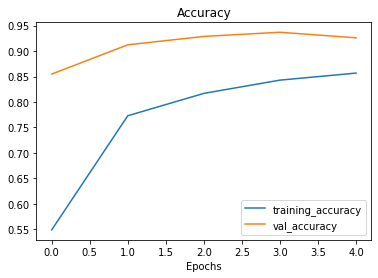

In [ ]:
plot_loss_curves(history_1)

### Fine tuning Model 1

In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-5]:
  layer.trainable = False

# Recompile model with lower learning rate
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(1e-4),
                metrics=['accuracy'])

# Fine-tune for 5 more epochs
fine_tune_epochs = 10
history_1_fine_tune_1 = model_1.fit(train_data,
                                    epochs=fine_tune_epochs,
                                    validation_data=valid_data,
                                    validation_steps= int(len(valid_data)), 
                                    initial_epoch=history_1.epoch[-1])  

Epoch 5/10
326/326 [==============================] - 82s 226ms/step - loss: 0.4399 - accuracy: 0.8769 - val_loss: 0.2109 - val_accuracy: 0.9479
Epoch 6/10
326/326 [==============================] - 69s 210ms/step - loss: 0.3764 - accuracy: 0.8906 - val_loss: 0.2219 - val_accuracy: 0.9370
Epoch 7/10
326/326 [==============================] - 64s 196ms/step - loss: 0.3362 - accuracy: 0.9001 - val_loss: 0.2079 - val_accuracy: 0.9397
Epoch 8/10
326/326 [==============================] - 64s 198ms/step - loss: 0.3007 - accuracy: 0.9133 - val_loss: 0.1997 - val_accuracy: 0.9370
Epoch 9/10
326/326 [==============================] - 61s 186ms/step - loss: 0.2780 - accuracy: 0.9184 - val_loss: 0.1831 - val_accuracy: 0.9425
Epoch 10/10
326/326 [==============================] - 60s 184ms/step - loss: 0.2568 - accuracy: 0.9234 - val_loss: 0.1831 - val_accuracy: 0.9425


In [ ]:
# Evaluating the model
model_1.evaluate(test_data)

12/12 [==============================] - 2s 123ms/step - loss: 0.1164 - accuracy: 0.9699


[0.11641234159469604, 0.9698629975318909]

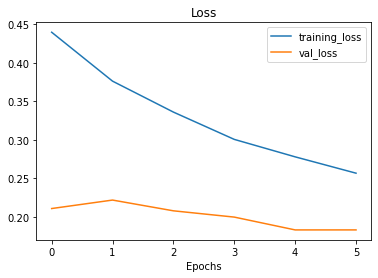

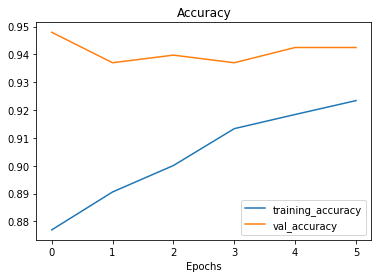

In [ ]:
plot_loss_curves(history_1_fine_tune_1)

## Saving Model in different formats

In [ ]:
# Saving keras model
model_1.save("/content/drive/MyDrive/Sports-Recognition/Model-Keras")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Sports-Recognition/Model-Keras/assets


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
# Saving model in h5 format
model_1.save("/content/drive/MyDrive/Sports-Recognition/Sports-Recogn.h5")

/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


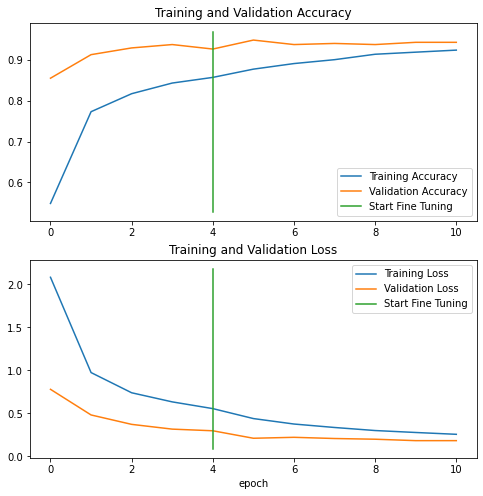

In [ ]:
compare_historys(history_1, history_1_fine_tune_1)

## Predictions on test data set

In [ ]:
# To get all the class names
class_ = train_data.class_indices
class_names = []
for key in class_.keys():
  class_names.append(key)

In [ ]:
class_names

['air hockey',
 'ampute football',
 'archery',
 'arm wrestling',
 'balance beam',
 'barell racing',
 'baseball',
 'basketball',
 'billiards',
 'bmx',
 'bobsled',
 'bowling',
 'boxing',
 'bull riding',
 'canoe slamon',
 'cricket',
 'croquet',
 'curling',
 'fencing',
 'field hockey',
 'figure skating men',
 'figure skating pairs',
 'figure skating women',
 'football',
 'formula 1 racing',
 'frisbee',
 'giant slalom',
 'golf',
 'hammer throw',
 'harness racing',
 'high jump',
 'hockey',
 'horse jumping',
 'horse racing',
 'hurdles',
 'ice climbing',
 'jai alai',
 'javelin',
 'judo',
 'lacrosse',
 'luge',
 'motorcycle racing',
 'nascar racing',
 'olympic wrestling',
 'parallel bar',
 'pole vault',
 'polo',
 'pommel horse',
 'rings',
 'rock climbing',
 'rollerblade racing',
 'rowing',
 'rugby',
 'sailboat racing',
 'shot put',
 'ski jumping',
 'skydiving',
 'snow boarding',
 'snowmobile racing',
 'speed skating',
 'sumo wrestling',
 'surfing',
 'swimming',
 'table tennis',
 'tennis',
 'trac

In [ ]:
label_val = []
for elem in test_data.filepaths:
  for cl in range(len(class_names)):
    if elem.split("/")[3] == class_names[cl]:
      label_val.append(cl)

In [ ]:
label_val[5:10]

[1, 1, 1, 1, 1]

In [ ]:
# Getting prediction probabilites
pred_prob = model_1.predict(test_data)
pred_prob

array([[9.99394059e-01, 3.21086768e-10, 6.24899066e-09, ...,
        4.76699796e-07, 1.74112946e-10, 3.65623727e-08],
       [7.69464612e-01, 5.66820439e-08, 9.42717282e-09, ...,
        1.30542890e-06, 1.07638542e-07, 3.78234013e-08],
       [9.99001443e-01, 1.17299175e-08, 1.45746156e-07, ...,
        1.36079677e-06, 1.46693124e-09, 8.10197889e-07],
       ...,
       [8.10588041e-09, 6.66617976e-12, 8.07079126e-11, ...,
        5.93708025e-12, 5.37473825e-05, 9.94055629e-01],
       [5.46443690e-09, 5.35664735e-10, 5.74573944e-09, ...,
        1.32764788e-09, 1.43496582e-05, 9.98372912e-01],
       [6.22552565e-10, 7.47242979e-09, 7.20547007e-07, ...,
        3.70804472e-08, 3.74826050e-06, 9.95679736e-01]], dtype=float32)

In [ ]:
y_pred = pred_prob.argmax(axis=1)
y_pred[:50]

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6, 15,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9, 72,  9,  9, 65])

In [ ]:
y_true = np.array(label_val)
y_true[:50]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8, 9, 9, 9, 9, 9])

## Confusion Matrix

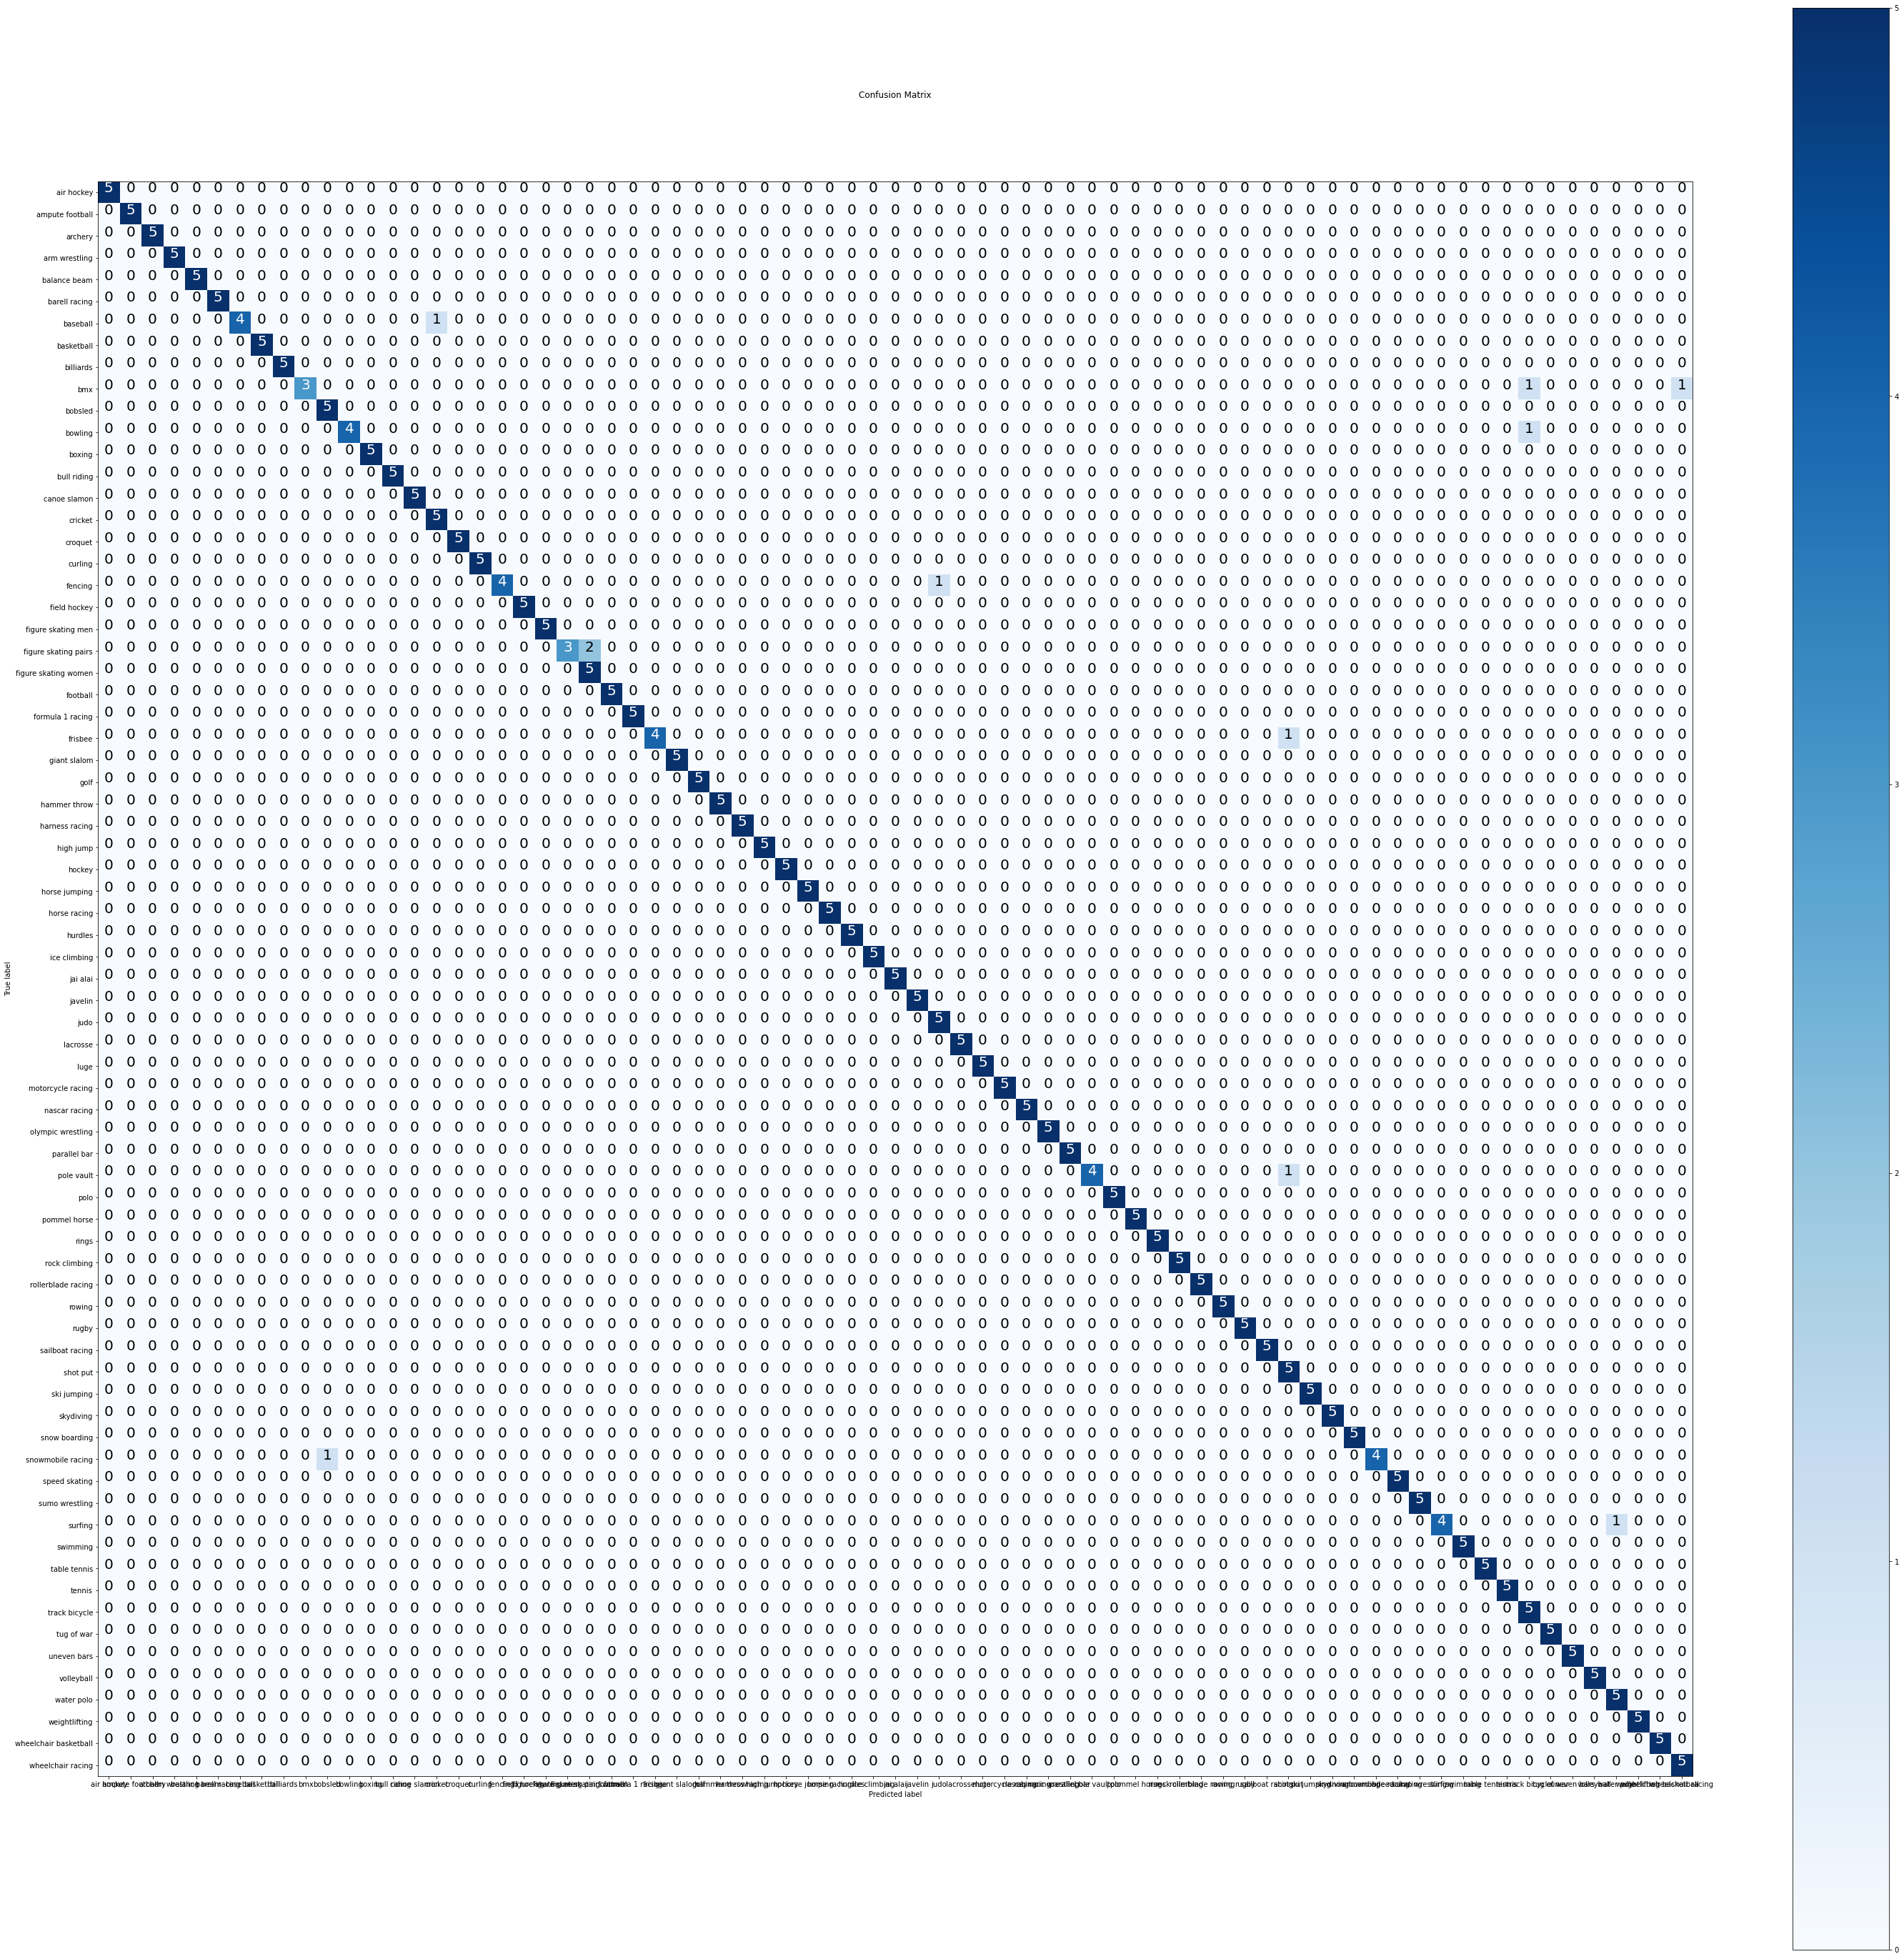

In [ ]:
# Plotting confusion matrix
make_confusion_matrix(y_true=y_true,
                      y_pred=y_pred,
                      classes=class_names,
                      figsize=(50, 50),
                      text_size=20,
                      norm=False)

## Tensorflow for JS

In [ ]:
# Installing tensorflow-js
!pip install tensorflowjs

In [ ]:
# importing dependancies
import tensorflowjs

In [ ]:
# converting model to json
!tensorflowjs_converter --input_format keras \
                       /content/drive/MyDrive/Sports-Recognition/Sports-Recogn.h5  \
                       /content/drive/MyDrive/Sports-Recognition/JS-Model

weight normalization/count with shape () and dtype int64 was auto converted to the type int32


In [ ]:
# converting model to json
!tensorflowjs_converter --input_format keras \
                       /content/drive/MyDrive/Sports-Recognition/Model-Keras/saved_model.pb \
                       /content/drive/MyDrive/Sports-Recognition/JS-Model-2

In [ ]:
!tensorflowjs_converter --input_format keras --output_format=tfjs_graph_model \
                        /content/drive/MyDrive/Sports-Recognition/Sports-Recogn.h5 \
                        /content/drive/MyDrive/Sports-Recognition/JS-Model-2

2021-10-05 09:36:49.048997: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-05 09:36:49.070434: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-05 09:36:49.071044: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-05 09:36:49.072121: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-10-05 09:36:49.072907: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
fp = "/content/test/air hockey/2.jpg"
image = tf.io.read_file(fp)
image = tf.io.decode_image(image)
# image = plt.imread(fp)

In [ ]:
tf.convert_to_tensor(image, dtype=tf.uint8)

<tf.Tensor: shape=(224, 224, 3), dtype=uint8, numpy=
array([[[ 56,  50,  36],
        [ 58,  51,  35],
        [ 59,  45,  32],
        ...,
        [255, 238, 211],
        [241, 215, 198],
        [ 31,   3,   0]],

       [[ 55,  49,  33],
        [ 57,  50,  32],
        [ 59,  46,  29],
        ...,
        [253, 226, 199],
        [184, 151, 132],
        [ 45,  12,   0]],

       [[ 55,  50,  28],
        [ 55,  49,  27],
        [ 59,  47,  25],
        ...,
        [117,  71,  47],
        [ 75,  28,   8],
        [ 69,  22,   4]],

       ...,

       [[ 38,   0,   0],
        [ 42,   3,   0],
        [ 51,   7,   0],
        ...,
        [ 65,   6,   0],
        [ 72,   4,   1],
        [ 74,   3,   1]],

       [[ 42,   1,   0],
        [ 47,   3,   0],
        [ 63,  16,   6],
        ...,
        [ 68,  10,   0],
        [ 71,   8,   1],
        [ 70,   5,   0]],

       [[ 48,   4,   3],
        [ 51,   6,   1],
        [ 68,  21,  11],
        ...,
        [ 69,  11,   